In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("C:/Users/0105l/Desktop/고려대학교/대학교/3학년 1학기/통계적머신러닝 PBL/팀프로젝트/data/preprocessed_loan_data.csv")

In [8]:
df1 = pd.read_csv("C:/Users/0105l/Desktop/고려대학교/대학교/3학년 1학기/통계적머신러닝 PBL/팀프로젝트/data/loan_data_set.csv")

In [2]:
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]

In [3]:
df.shape

(614, 12)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [5]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [6]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [8]:
# 모델링

In [26]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델 생성 및 학습
lr_clf = LogisticRegression(C=1)
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

# 성능 평가
print('Accuacy Score: ', accuracy_score(y_test, pred))
print('ROC AUC Score: ', roc_auc_score(y_test, pred))

Accuacy Score:  0.8216216216216217
ROC AUC Score:  0.7155172413793103


In [20]:
def cut_off(y,threshold=0.5):
    Y = y.copy() # copy함수를 사용하여 이전의 y값이 변화지 않게 함
    Y[Y>threshold]=1
    Y[Y<=threshold]=0
    return(Y.astype(int))

pred_Y = cut_off(pred,0.676)
pred_Y

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [21]:
#print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, pred_Y))

0.8216216216216217


In [38]:
from numpy import sqrt
from numpy import argmax
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

#Youden’s J statistic. / J = Sensitivity + Specificity – 1
y_prob = lr_clf.predict_proba(X)
y_prob2 = y_prob[:,1]

# calculate roc curves
fpr, tpr, thresholds = plot_roc_curve(y_test, y_prob2)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f, sensitivity = %.3f, specificity = %.3f, J=%.3f' % (best_thresh, tpr[ix], 1-fpr[ix], J[ix]))

y_prob_pred = (model.predict_proba(X_test_features)[:,1] >= best_thresh).astype(bool)
print(classification_report(y_test, y_prob_pred, target_names=['normal', 'abnormal']))

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


TypeError: plot_roc_curve() missing 1 required positional argument: 'y'

In [30]:
#plot roc and best threshold
sens, spec = tpr[ix], 1-fpr[ix]
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', markersize=0.01, color='black')
plt.plot(fpr, tpr, marker='.', color='black', markersize=0.05, label="XGBClassifier AUC = %.2f" % roc_auc_score(y_test, y_prob2))
plt.scatter(fpr[ix], tpr[ix], marker='+', s=100, color='r', 
            label='Best threshold = %.3f, \nSensitivity = %.3f, \nSpecificity = %.3f' % (best_thresh, sens, spec))

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)

# show the plot
plt.show()

NameError: name 'tpr' is not defined

In [14]:
from sklearn.model_selection import GridSearchCV

params = {'penalty':['l2', 'l1'],
         'C':[0.01, 0.1, 1, 5, 10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy')
grid_clf.fit(X_train, y_train)
print('최적 하이퍼 파라미터 :{0}, 최적 평균 정확도 :{1:.3f}'.format(grid_clf.best_params_,
                                                   grid_clf.best_score_))

y_train_pred=grid_clf.predict(X_train)
y_test_pred=grid_clf.predict(X_test)

print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

최적 하이퍼 파라미터 :{'C': 1, 'penalty': 'l2'}, 최적 평균 정확도 :0.797
0.8065268065268065
0.8216216216216217


C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

In [39]:
from sklearn.linear_model import LogisticRegression
LR_clf = LogisticRegression(C=1, penalty='l2')

LR_clf.fit(X_train, y_train) 
y_train_pred=LR_clf.predict(X_train)
y_test_pred=LR_clf.predict(X_test)

print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

0.8065268065268065
0.8216216216216217


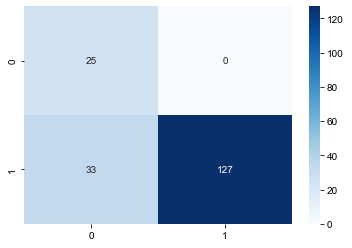

In [63]:
# 지수 : gini, 최대 노드 깊이 : 9 일때의 confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import f1_score
LR_clf = LogisticRegression(C=1, penalty='l2')
LR_clf.fit(X_train, y_train)
pred = LR_clf.predict(X_test)
pred = np.round(pred)
LR_clf_score = f1_score(pred,y_test,average='macro')

cf_matrix = confusion_matrix(pred,y_test)
ax = sns.heatmap(cf_matrix,cmap='Blues',annot=True,fmt='g')
sns.set(rc = {'figure.figsize':(5,5)})

In [58]:
from sklearn import metrics
print(metrics.classification_report(y_train_pred, y_train))
print(metrics.classification_report(y_test_pred, y_test))

              precision    recall  f1-score   support

           0       0.45      0.87      0.59        69
           1       0.97      0.79      0.87       360

    accuracy                           0.81       429
   macro avg       0.71      0.83      0.73       429
weighted avg       0.89      0.81      0.83       429

              precision    recall  f1-score   support

           0       0.43      1.00      0.60        25
           1       1.00      0.79      0.89       160

    accuracy                           0.82       185
   macro avg       0.72      0.90      0.74       185
weighted avg       0.92      0.82      0.85       185



In [40]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일 때 예측 확률 추출
pred_proba_class_1 = LR_clf.predict_proba(X_test)[:,1]
pred_proba_class_1

array([0.72112471, 0.79578388, 0.78962419, 0.90141792, 0.80010995,
       0.87271675, 0.69283486, 0.61969896, 0.24616872, 0.73752065,
       0.81903995, 0.69790914, 0.79138272, 0.80198461, 0.93238337,
       0.17797484, 0.86450248, 0.69067312, 0.76743018, 0.31755125,
       0.64969085, 0.6972725 , 0.88862272, 0.6665013 , 0.81346546,
       0.76326547, 0.82446904, 0.86190214, 0.25814592, 0.56483047,
       0.87661764, 0.58023848, 0.62980607, 0.66277973, 0.90237448,
       0.51458888, 0.82674171, 0.81046793, 0.13295901, 0.81385983,
       0.80354993, 0.81343261, 0.80878694, 0.12159371, 0.67901375,
       0.73955646, 0.75205698, 0.81667977, 0.79586583, 0.65318168,
       0.78873387, 0.83570198, 0.22857531, 0.67141415, 0.71930548,
       0.63334123, 0.72877918, 0.17142798, 0.77352452, 0.80000353,
       0.87439782, 0.66556621, 0.85832917, 0.72510213, 0.81393808,
       0.56770656, 0.21109651, 0.78146543, 0.92061058, 0.81858829,
       0.77597979, 0.82264435, 0.84579531, 0.80316983, 0.71997

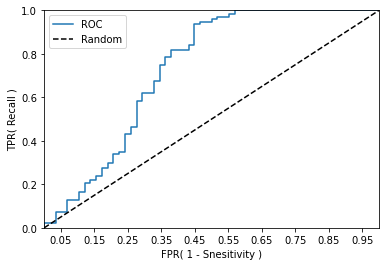

In [41]:
import matplotlib.pyplot as plt

def roc_curve_plot(y_test, pred_proba_c1):
    # 임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선을 시각화
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선
    plt.plot([0,1],[0,1], 'k--',label='Random')
    
    # FPR X 축의 scla 0.1 단위 지정
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR( 1 - Snesitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba_class_1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


In [54]:
from sklearn.linear_model import LogisticRegression
LR_clf = LogisticRegression()

LR_clf.fit(X_train, y_train) 
y_train_pred=LR_clf.predict(X_train)
y_test_pred=LR_clf.predict(X_test)

print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

0.8065268065268065
0.8216216216216217


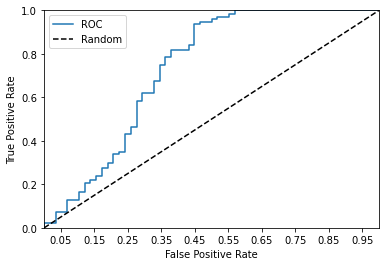

In [57]:
import matplotlib.pyplot as plt

def roc_curve_plot(y_test, pred_proba_c1):
    # 임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선을 시각화
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선
    plt.plot([0,1],[0,1], 'k--',label='Random')
    
    # FPR X 축의 scla 0.1 단위 지정
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba_class_1)

In [ ]:
from sklearn.model_selection import GridSearchCV
n = []
d = []
for i in range(100):
    n.append(i)
for i in range(10):
    d.append(i)
params = {'n_estimators':n,
          'max_depth':d}
          #'min_samples_leaf':[],
          #'min_samples_split':[]

from xgboost import LogisticRegression
xgb = LogisticRegression(random_state=1)
grid_cv = GridSearchCV(xgb, param_grid=params, scoring='accuracy')
grid_cv.fit(X_train, y_train)

print(grid_cv.best_params_)
print(grid_cv.best_score_)

## GridSearchCV

In [64]:
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.model_selection import GridSearchCV

n = []
d = []
for i in range(200):
    n.append(i)
for i in range(10):
    d.append(i)
params = {'n_estimators':n}
          #'max_samples':d}
          #'min_samples_leaf':[],
          #'min_samples_split':[]}

from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(max_depth=4, random_state=1) 
grid_cv = GridSearchCV(gbcl, param_grid=params, scoring='accuracy')
grid_cv.fit(X_train, y_train)

print(grid_cv.best_params_)
print(grid_cv.best_score_)

y_train_pred=grid_cv.predict(X_train)
y_test_pred=grid_cv.predict(X_test)

print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

{'n_estimators': 28}
0.7927222982216142
0.8741258741258742
0.7837837837837838


In [234]:
gbcl = GradientBoostingClassifier(n_estimators=65, max_depth=3, random_state=1) 
gbcl.fit(X_train, y_train)

y_train_pred=gbcl.predict(X_train)
y_test_pred=gbcl.predict(X_test)

print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

0.8834498834498834
0.7783783783783784


In [63]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

gbcl=GradientBoostingClassifier(n_estimators=50, max_depth=4) 
gbcl.fit(X_train, y_train)
accuracies=[accuracy_score(y_test,y_pred) for y_pred in gbcl.staged_predict(X_test)]

best_n_estimator=np.argmax(accuracies)
gbcl_best=GradientBoostingClassifier(max_depth=4, n_estimators=best_n_estimator)
gbcl_best.fit(X_train, y_train)
y_train_pred=gbcl_best.predict(X_train)
y_test_pred=gbcl_best.predict(X_test)

print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))
print(best_n_estimator)

0.8228438228438228
0.8054054054054054
5


In [19]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators=5, max_depth=4, random_state=1) 
gbcl.fit(X_train, y_train)

y_train_pred=gbcl.predict(X_train)
y_test_pred=gbcl.predict(X_test)

print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

0.8228438228438228
0.8054054054054054


In [20]:
from sklearn import metrics
print(metrics.classification_report(y_train_pred, y_train))
print(metrics.classification_report(y_test_pred, y_test))

              precision    recall  f1-score   support

           0       0.47      0.93      0.62        68
           1       0.98      0.80      0.88       361

    accuracy                           0.82       429
   macro avg       0.73      0.86      0.75       429
weighted avg       0.90      0.82      0.84       429

              precision    recall  f1-score   support

           0       0.41      0.92      0.57        26
           1       0.98      0.79      0.87       159

    accuracy                           0.81       185
   macro avg       0.70      0.85      0.72       185
weighted avg       0.90      0.81      0.83       185



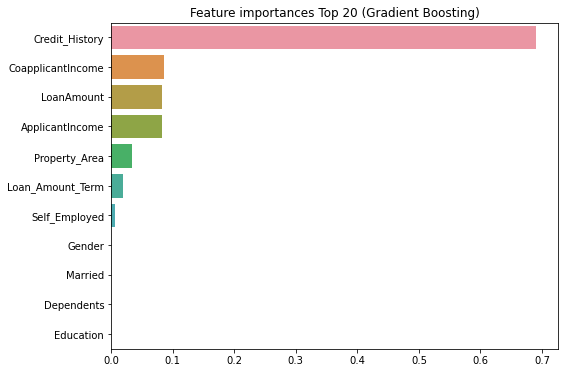

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# feature_importances_
gbcl_importances_values = gbcl.feature_importances_
#index는 features명이므로 data.columns로 설정
gbcl_importances = pd.Series(gbcl_importances_values, index=X_train.columns)
gbcl_top20 = gbcl_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20 (Gradient Boosting)')
sns.barplot(x=gbcl_top20, y=gbcl_top20.index)
plt.show()

## xgboost (max_depth=2)

In [7]:
from xgboost import XGBClassifier
from matplotlib import pyplot

In [9]:
from sklearn.model_selection import GridSearchCV
n = []
d = []
for i in range(100):
    n.append(i)
for i in range(10):
    d.append(i)
params = {'n_estimators':n,
          'max_depth':d}
          #'min_samples_leaf':[],
          #'min_samples_split':[]

from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=1)
grid_cv = GridSearchCV(xgb, param_grid=params, scoring='accuracy')
grid_cv.fit(X_train, y_train)

print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'max_depth': 3, 'n_estimators': 2}
0.8066757865937074


C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
495 fits failed out of a total of 5000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
31 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Anaconda\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Anaconda\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Anaconda\lib\site-

In [24]:
xgb = XGBClassifier(n_estimators=2, max_depth=3)
xgb.fit(X_train, y_train)

y_train_pred=xgb.predict(X_train)
y_test_pred=xgb.predict(X_test)

print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

0.8228438228438228
0.8054054054054054


In [25]:
from sklearn import metrics
print(metrics.classification_report(y_train_pred, y_train))
print(metrics.classification_report(y_test_pred, y_test))

              precision    recall  f1-score   support

           0       0.46      0.94      0.62        66
           1       0.99      0.80      0.88       363

    accuracy                           0.82       429
   macro avg       0.72      0.87      0.75       429
weighted avg       0.91      0.82      0.84       429

              precision    recall  f1-score   support

           0       0.41      0.92      0.57        26
           1       0.98      0.79      0.87       159

    accuracy                           0.81       185
   macro avg       0.70      0.85      0.72       185
weighted avg       0.90      0.81      0.83       185



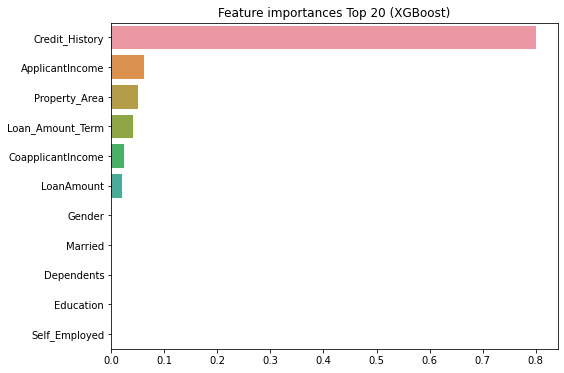

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# feature_importances_
xgb_importances_values = xgb.feature_importances_
#index는 features명이므로 data.columns로 설정
xgb_importances = pd.Series(xgb_importances_values, index=X_train.columns)
xgb_top20 = xgb_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20 (XGBoost)')
sns.barplot(x=xgb_top20, y=xgb_top20.index)
plt.show()

In [30]:
xgb.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.06261451, 0.02470722, 0.02093988, 0.04069294, 0.80104274,
       0.05000274], dtype=float32)

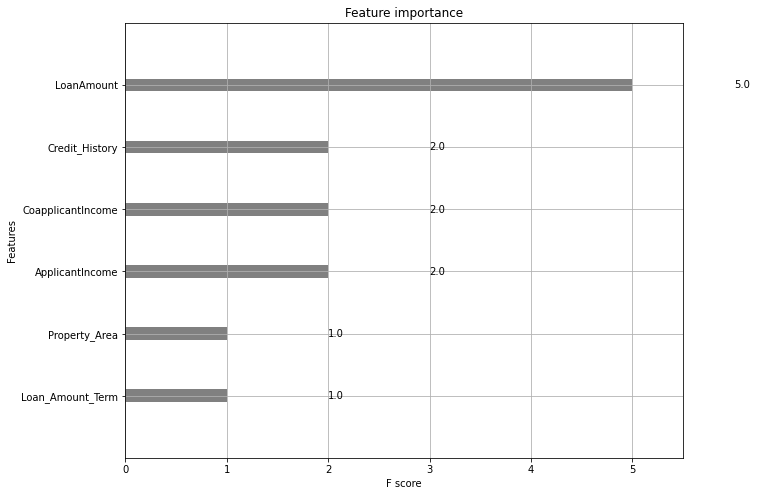

In [33]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb, ax=ax, color='gray');

## lightbgm 

In [42]:
# lightbgm 
from lightgbm import LGBMClassifier

In [43]:
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.model_selection import GridSearchCV
n = []
d = []
for i in range(200):
    n.append(i)
for i in range(10):
    d.append(i)
params = {'n_estimators':n,
          'max_depth':d}
          #'min_samples_leaf':[],
          #'min_samples_split':[]}

from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(random_state=1)
grid_cv = GridSearchCV(lgbm, param_grid=params, scoring='accuracy')
grid_cv.fit(X_train, y_train)

print(grid_cv.best_params_)
print(grid_cv.best_score_)

KeyboardInterrupt: 

In [44]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(n_estimators=30, max_depth=4, random_state=1)
lgbm.fit(X_train, y_train)

y_train_pred=lgbm.predict(X_train)
y_test_pred=lgbm.predict(X_test)

print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

0.8275058275058275
0.8162162162162162


In [45]:
from sklearn import metrics
print(metrics.classification_report(y_train_pred, y_train))
print(metrics.classification_report(y_test_pred, y_test))

              precision    recall  f1-score   support

           0       0.50      0.91      0.64        74
           1       0.98      0.81      0.89       355

    accuracy                           0.83       429
   macro avg       0.74      0.86      0.77       429
weighted avg       0.89      0.83      0.84       429

              precision    recall  f1-score   support

           0       0.45      0.93      0.60        28
           1       0.98      0.80      0.88       157

    accuracy                           0.82       185
   macro avg       0.72      0.86      0.74       185
weighted avg       0.90      0.82      0.84       185



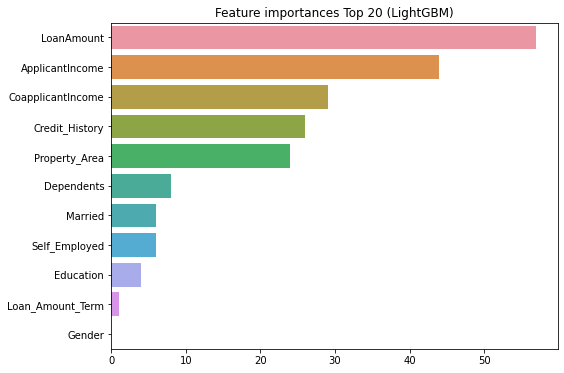

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# feature_importances_
lgbm_importances_values = lgbm.feature_importances_
#index는 features명이므로 data.columns로 설정
lgbm_importances = pd.Series(lgbm_importances_values, index=X_train.columns)
lgbm_top20 = lgbm_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20 (LightGBM)')
sns.barplot(x=lgbm_top20, y=lgbm_top20.index)
plt.show()

In [49]:
from catboost import Pool, CatBoostClassifier

train_dataset = Pool(data=X_train, label=y_train)
eval_dataset = Pool(data=X_test, label=y_test)

model = CatBoostClassifier(eval_metric='Accuracy')
model.fit(train_dataset, use_best_model=True, eval_set=eval_dataset)

Learning rate set to 0.025711
0:	learn: 0.8205128	test: 0.8000000	best: 0.8000000 (0)	total: 3.1ms	remaining: 3.09s
1:	learn: 0.8275058	test: 0.8216216	best: 0.8216216 (1)	total: 6ms	remaining: 3s
2:	learn: 0.8181818	test: 0.8216216	best: 0.8216216 (1)	total: 8.87ms	remaining: 2.95s
3:	learn: 0.8158508	test: 0.8216216	best: 0.8216216 (1)	total: 11.4ms	remaining: 2.83s
4:	learn: 0.8205128	test: 0.8108108	best: 0.8216216 (1)	total: 13.5ms	remaining: 2.69s
5:	learn: 0.8181818	test: 0.8108108	best: 0.8216216 (1)	total: 15.5ms	remaining: 2.56s
6:	learn: 0.8158508	test: 0.8216216	best: 0.8216216 (1)	total: 17.4ms	remaining: 2.47s
7:	learn: 0.8158508	test: 0.8216216	best: 0.8216216 (1)	total: 20.3ms	remaining: 2.52s
8:	learn: 0.8181818	test: 0.8216216	best: 0.8216216 (1)	total: 22.6ms	remaining: 2.49s
9:	learn: 0.8181818	test: 0.8216216	best: 0.8216216 (1)	total: 25.5ms	remaining: 2.52s
10:	learn: 0.8158508	test: 0.8216216	best: 0.8216216 (1)	total: 26.9ms	remaining: 2.42s
11:	learn: 0.813519

In [50]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

print(metrics.confusion_matrix(y_test, y_test_pred))

from sklearn import metrics
print(metrics.classification_report(y_train_pred, y_train))
print(metrics.classification_report(y_test_pred, y_test))

0.8275058275058275
0.8162162162162162
[[ 26  32]
 [  2 125]]
              precision    recall  f1-score   support

           0       0.50      0.91      0.64        74
           1       0.98      0.81      0.89       355

    accuracy                           0.83       429
   macro avg       0.74      0.86      0.77       429
weighted avg       0.89      0.83      0.84       429

              precision    recall  f1-score   support

           0       0.45      0.93      0.60        28
           1       0.98      0.80      0.88       157

    accuracy                           0.82       185
   macro avg       0.72      0.86      0.74       185
weighted avg       0.90      0.82      0.84       185



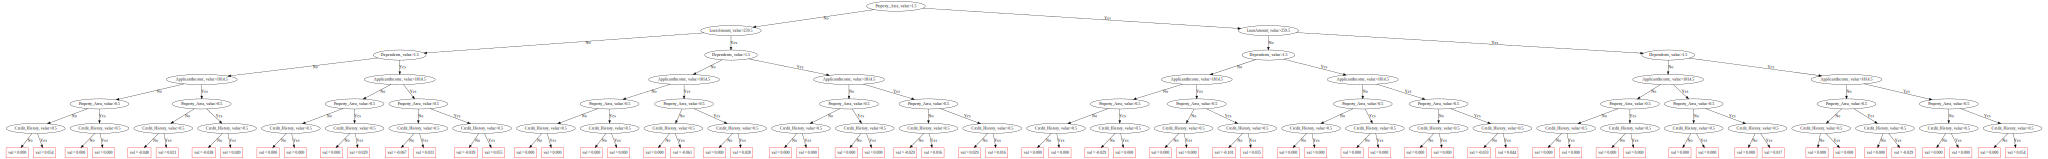

In [51]:
model.plot_tree(tree_idx=0, pool=train_dataset)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


In [47]:
lgbm.feature_importances_

array([ 0,  6,  8,  4,  6, 44, 29, 57,  1, 26, 24])

In [52]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=1)
result = dtc.fit(X_train, y_train)  # 적합
y_train_pred = dtc.predict(X_train) # Training accuracy
y_test_pred = dtc.predict(X_test)   # Test accuracy 

[Text(0.5, 0.8333333333333334, 'X[9] <= 0.5\ngini = 0.43\nsamples = 429\nvalue = [134, 295]'),
 Text(0.25, 0.5, 'X[6] <= 8115.0\ngini = 0.192\nsamples = 65\nvalue = [58, 7]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.17\nsamples = 64\nvalue = [58, 6]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.5, 'X[7] <= 302.0\ngini = 0.33\nsamples = 364\nvalue = [76, 288]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.314\nsamples = 348\nvalue = [68, 280]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.5\nsamples = 16\nvalue = [8, 8]')]

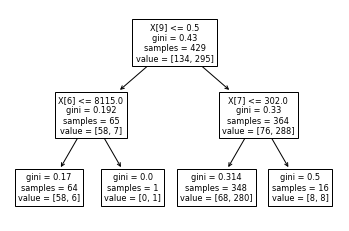

In [53]:
tree.plot_tree(dtc.fit(X_train, y_train))

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB
